In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
#Loading the dataset
df=pd.read_csv(r"C:\Users\surya\Downloads\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
#changing the categorical values into numeric values
df['State']=df['State'].astype('category')
df['State']=df['State'].cat.codes

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [5]:
#creating dummies for the converted values
df1 = pd.get_dummies(df, columns=['State'])
df1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_0,State_1,State_2
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [6]:
#describing the X and Y variables
x=df1.drop(columns='Profit')
y=df1['Profit']

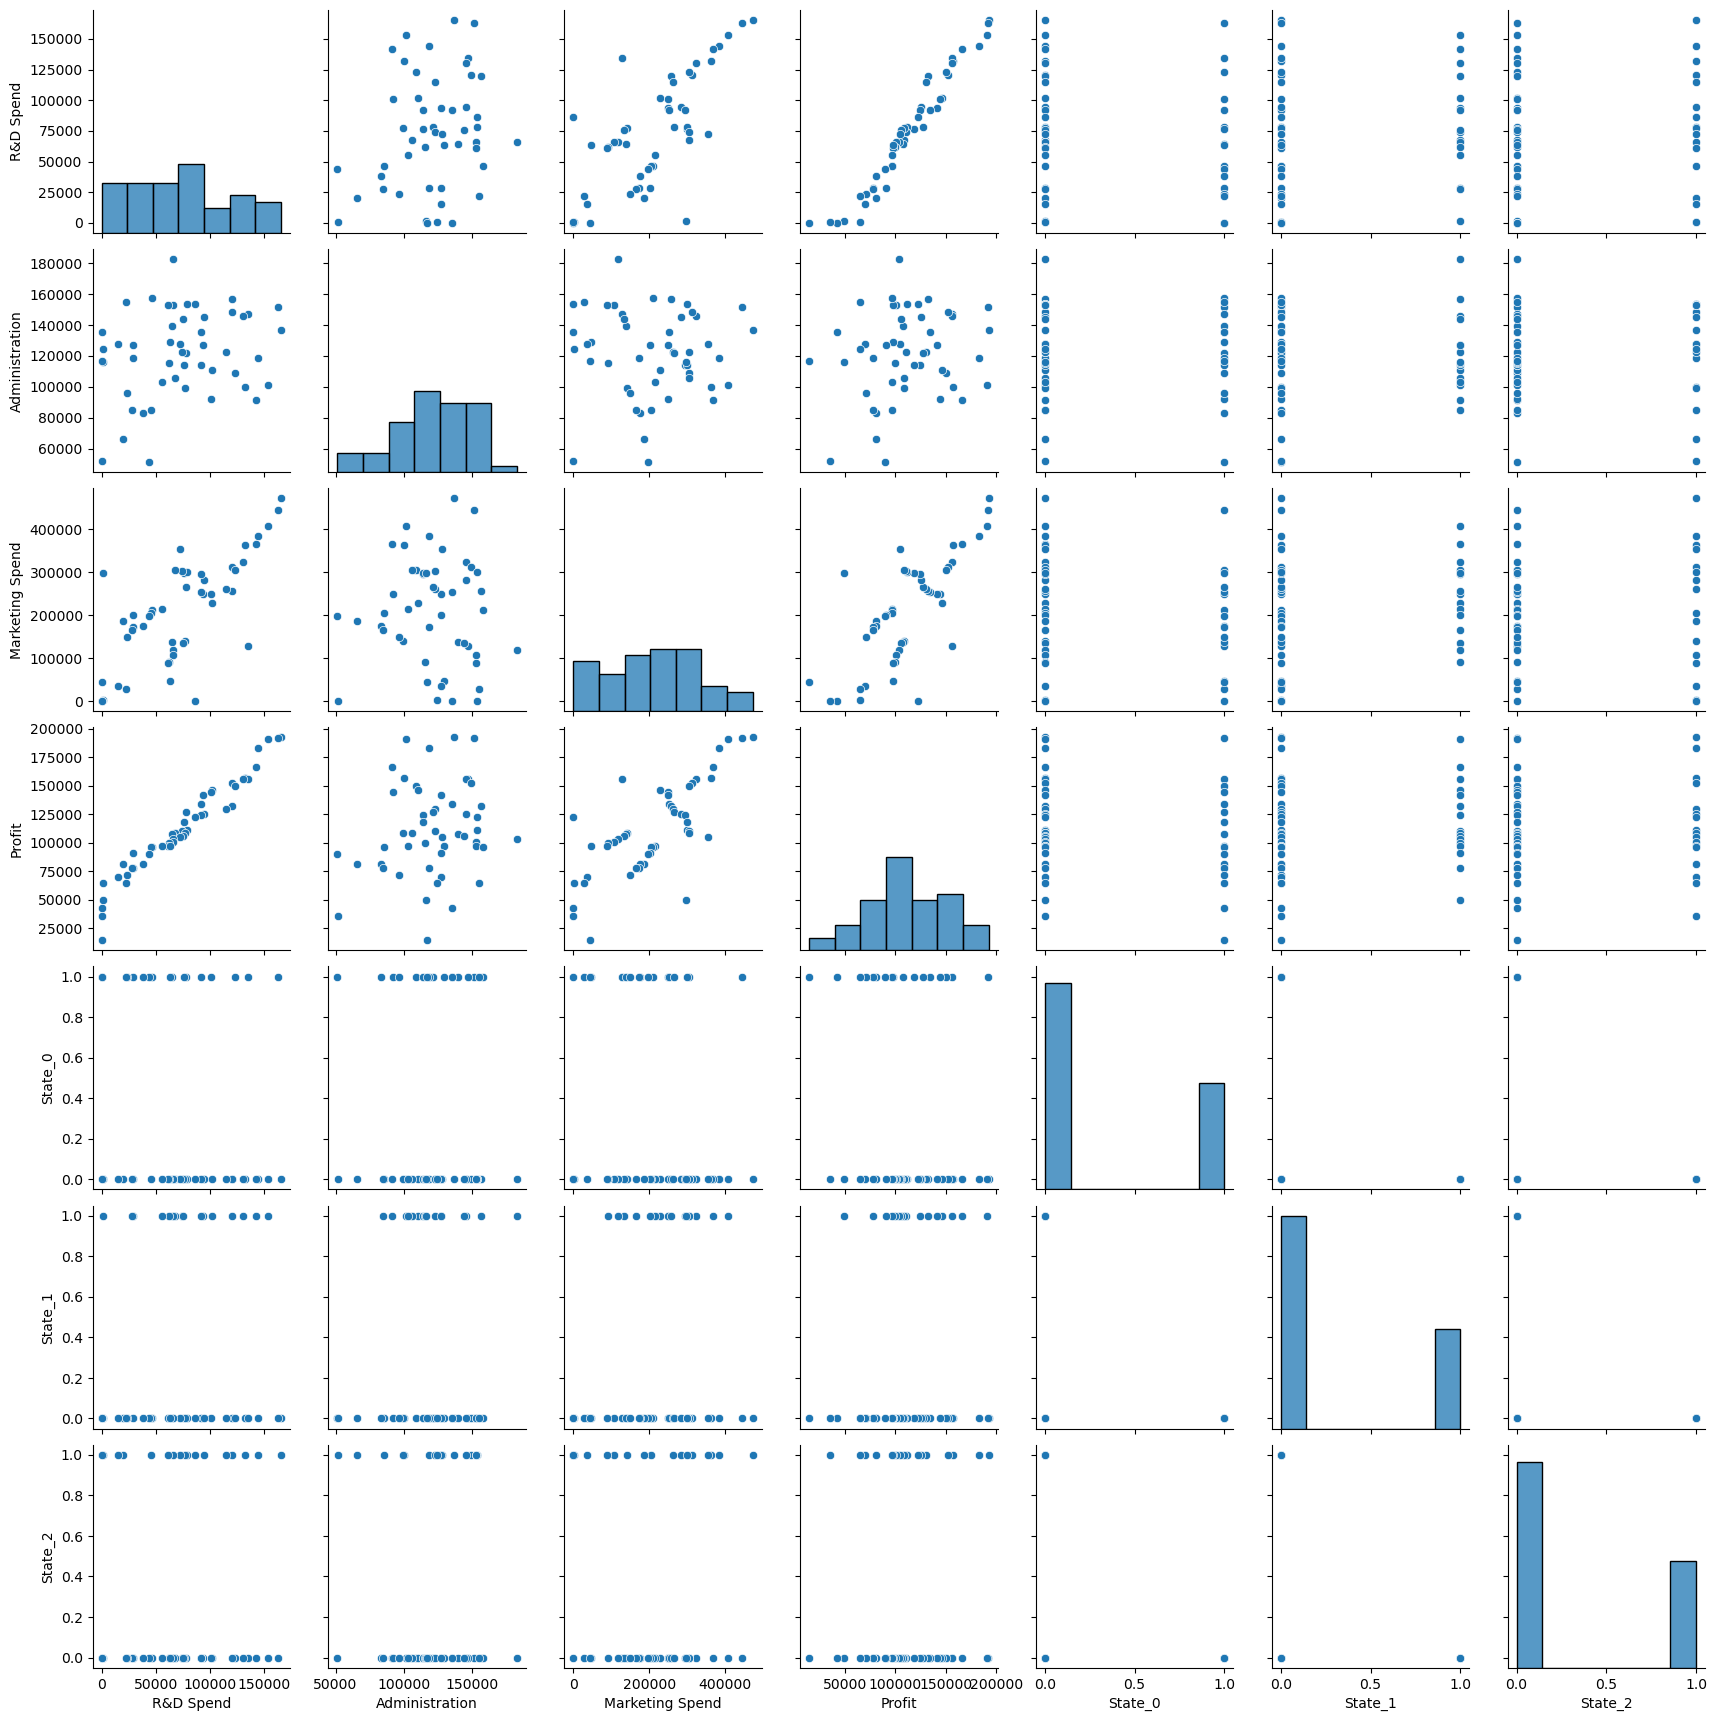

In [7]:
#plotting the graphs for each column
sns.pairplot(df1)

### Checking Multicollinearility

In [8]:
#calculating the correlation between the columns
co=df1.corr()

<Axes: >

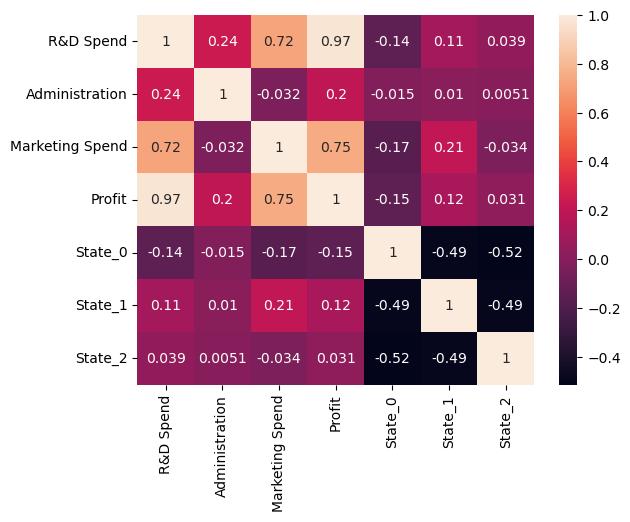

In [9]:
#plotting the correlation matrix
sns.heatmap(co, annot=True)

After observing the matrix, we can say that there is very less correlation between the administration,states and profit.

Here I dropped only one column from dummy state, because to increase the significance.

So it is better to drop this columns from the input variable list, then it will be more significant. 

In [10]:
df1=df1.iloc[:,0:6]
df1=df1.drop(columns='Administration')

In [11]:
#Again dividing the X and Y variables as we removed administration and state
X=df1.drop(columns='Profit')
Y=df1['Profit']

In [12]:
#Splitting the Data into train and test data.
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.3, random_state=0)

### 1-Without transformation of X and Y variables

In [13]:
#Fitting the data and predicting the values of Y variable..
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
lr1=regressor.fit(x_train, y_train)
y_pred= regressor.predict(x_test)

In [14]:
print("R^2 value of train data-",regressor.score(x_train,y_train))
print("R^2 value of test data-",regressor.score(x_test,y_test))

R^2 value of train data- 0.9512985587367659
R^2 value of test data- 0.9431387536607481


We can observe 

-That there is 95% of siginficance is there with training dataset.

-The model has 94% of significance with respect to testing dataset.


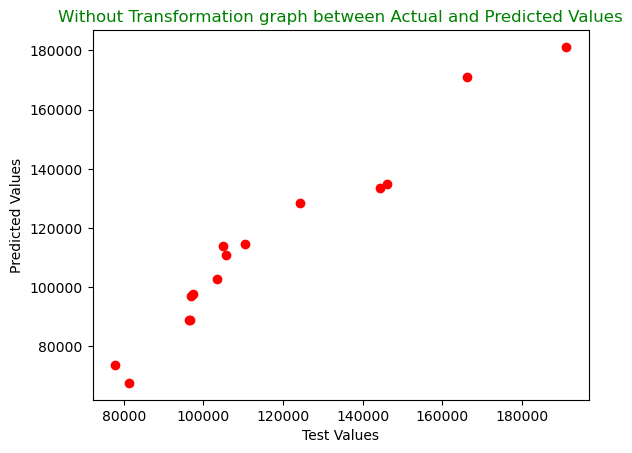

In [15]:
plt.title("Without Transformation graph between Actual and Predicted Values",fontdict={'color':'g'})
plt.scatter(y_test,y_pred,c='r')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.show()

After observing the graph, we can see that the actual and predicted values are almost linear. We can finalize this model because we have a good r^2 value and also the values are more linear but we will see some other transformations also.

### 2-Transformation X into Square Root of X

In [16]:
sqrt_x_train, sqrt_x_test=np.sqrt(x_train),np.sqrt(x_test)

lr2=regressor.fit(sqrt_x_train, y_train)
lr2

LinearRegression()

In [17]:
y_pred1=regressor.predict(sqrt_x_test)
y_pred1

array([111654.4463306 , 134433.66918907, 134732.97090763,  83448.66583878,
       161666.61561172, 125270.4174307 ,  80647.13846516, 112333.26337255,
       120729.68105723, 156166.53110858, 107044.45360137, 104759.59091566,
       117817.0434142 , 100297.79927357, 130680.83496051])

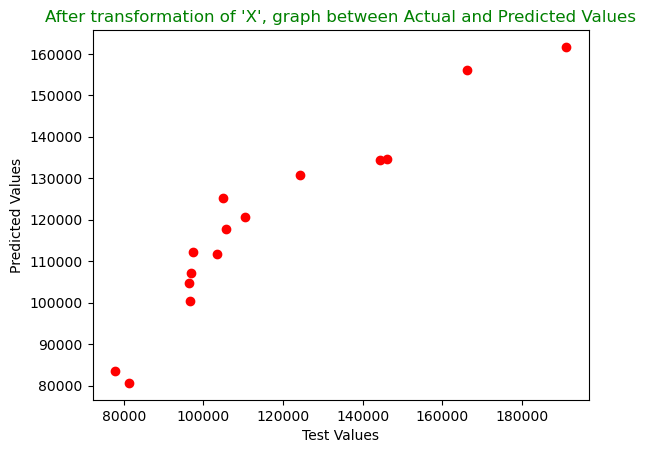

In [18]:
plt.title("After transformation of 'X', graph between Actual and Predicted Values",fontdict={'color':'g'})
plt.scatter(y_test,y_pred1,c='r')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.show()

In [19]:
print("R^2 value of training-",regressor.score(sqrt_x_train,y_train))
print("R^2 value of testing-",regressor.score(sqrt_x_test,y_test))

R^2 value of training- 0.9209970068812536
R^2 value of testing- 0.8338843647481906


We can observe 

-That there is 92% of siginficance is there with training dataset.

-The model has 83% of significance with respect to testing dataset.

### 3-Transformstion of Y into Square Root of Y

In [20]:
sqrt_y_train, sqrt_y_test=np.sqrt(y_train),np.sqrt(y_test)

In [21]:
lr3=regressor.fit(x_train, sqrt_y_train)
y_pred2=regressor.predict(x_test)
lr3

LinearRegression()

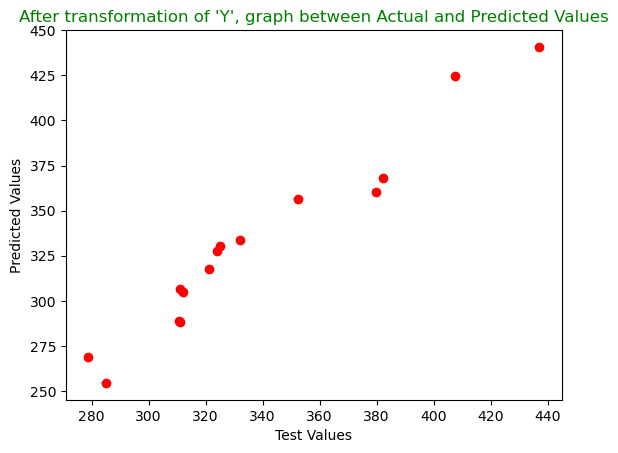

In [22]:
plt.title("After transformation of 'Y', graph between Actual and Predicted Values",fontdict={'color':'g'})
plt.scatter(sqrt_y_test,y_pred2,c='r')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.show()

In [23]:
print("R^2 value of training-",regressor.score(x_train,sqrt_y_train))
print("R^2 value of testing-",regressor.score(x_test,sqrt_y_test))

R^2 value of training- 0.8928811989235136
R^2 value of testing- 0.8926367608740202


We can observe 

-That there is 89% of siginficance is there with training dataset.

-The model has 89% of significance with respect to testing dataset.

### 4-Transformation of Both X and Y

In [24]:
lr4=regressor.fit(sqrt_x_train,sqrt_y_train)
y_pred3=regressor.predict(sqrt_x_test)
lr4

LinearRegression()

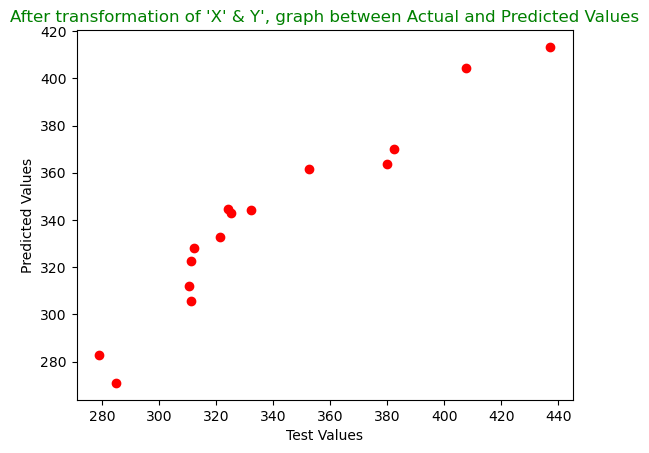

In [25]:
plt.title("After transformation of 'X' & Y', graph between Actual and Predicted Values",fontdict={'color':'g'})
plt.scatter(sqrt_y_test,y_pred3,c='r')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.show()

In [26]:
print("R^2 value of Training-",regressor.score(sqrt_x_train,sqrt_y_train))
print("R^2 value of Testing-",regressor.score(sqrt_x_test,sqrt_y_test))

R^2 value of Training- 0.9337221145425322
R^2 value of Testing- 0.9041739226044738


We can observe 

-That there is 93% of siginficance is there with training dataset.

-The model has 90% of significance with respect to testing dataset.

### 5-Transformation of X into Cube root of X

In [27]:
lr5=regressor.fit(np.cbrt(x_train),y_train)
y_pred4=regressor.predict(np.cbrt(x_test))
lr5

LinearRegression()

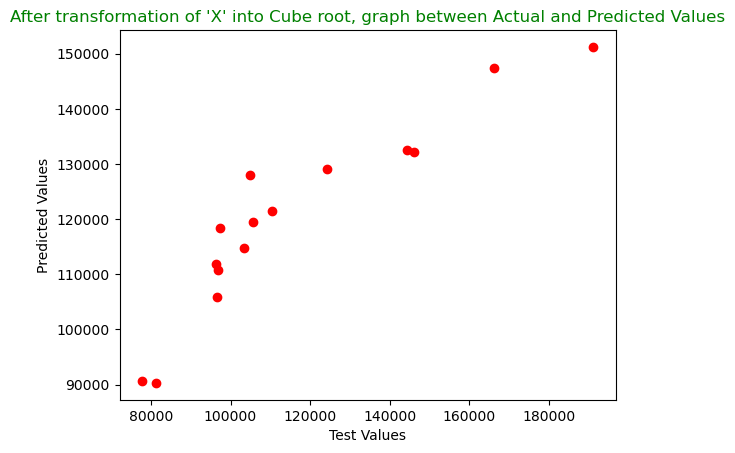

In [28]:
plt.title("After transformation of 'X' into Cube root, graph between Actual and Predicted Values",fontdict={'color':'g'})
plt.scatter(y_test,y_pred4,c='r')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.show()

In [29]:
print("R^2 value of Training-",regressor.score(np.cbrt(x_train),y_train))
print("R^2 value of Testing-",regressor.score(np.cbrt(x_test),y_test))

R^2 value of Training- 0.8609342858602278
R^2 value of Testing- 0.6914080538319536


We can observe 

-That there is 86% of siginficance is there with training dataset.

-The model has 69% of significance with respect to testing dataset.

### 6-Transformation of 'Y' into cube root

In [30]:
lr6=regressor.fit(x_train,np.cbrt(y_train))
y_pred5=regressor.predict(np.cbrt(x_test))
lr6

LinearRegression()

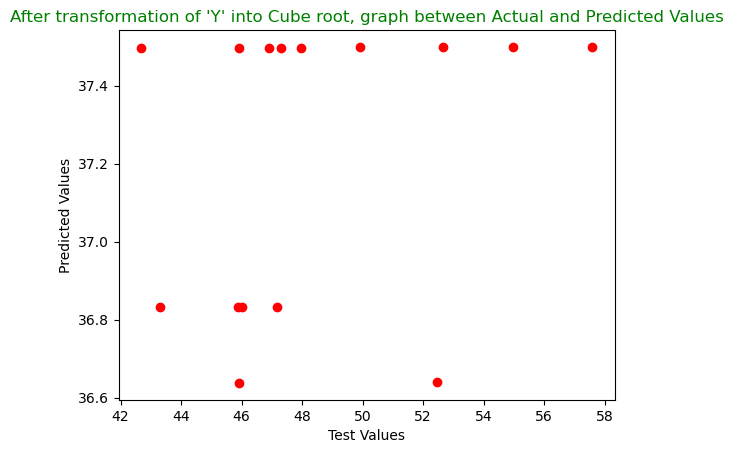

In [31]:
plt.title("After transformation of 'Y' into Cube root, graph between Actual and Predicted Values",fontdict={'color':'g'})
plt.scatter(np.cbrt(y_test),y_pred5,c='r')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.show()

In [32]:
print("R^2 value of Training-",regressor.score(x_train,np.cbrt(y_train)))
print("R^2 value of Testing-",regressor.score(x_test,np.cbrt(y_test)))

R^2 value of Training- 0.8579367755391365
R^2 value of Testing- 0.8475998477959398


We can observe

-That there is 85% of siginficance is there with training dataset.

-The model has 84% of significance with respect to testing dataset.

### 7-Transformation of 'X' and 'Y' into cube root

In [33]:
lr7=regressor.fit(np.cbrt(x_train),np.cbrt(y_train))
y_pred6=regressor.predict(np.cbrt(x_test))
lr7

LinearRegression()

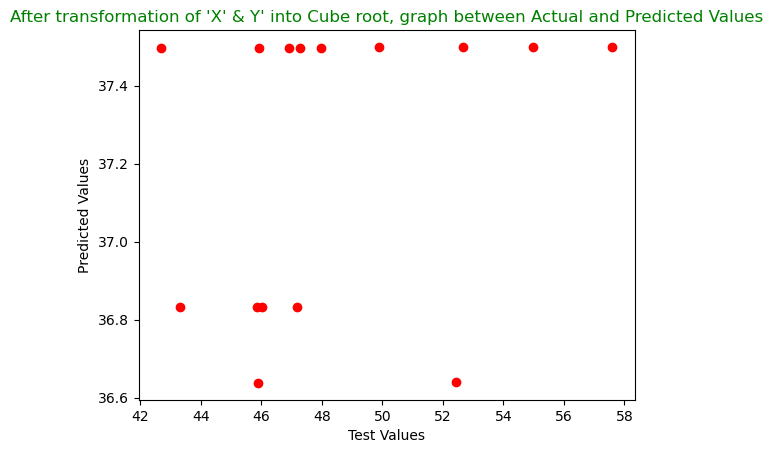

In [34]:
plt.title("After transformation of 'X' & Y' into Cube root, graph between Actual and Predicted Values",fontdict={'color':'g'})
plt.scatter(np.cbrt(y_test),y_pred5,c='r')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.show()

In [35]:
print("R^2 value of Training-",regressor.score(np.cbrt(x_train),np.cbrt(y_train)))
print("R^2 value of Testing-",regressor.score(np.cbrt(x_test),np.cbrt(y_test)))

R^2 value of Training- 0.9154257977259146
R^2 value of Testing- 0.8444969182793866


We cannot perform log transformation because the values are in larger size.

### Final Verdict
By observing the all model results we can clearly declare that model 1 fits best for the given dataset.